# Mozilla 2019 Outreachy Data Science Project

## Part 1: Initial Contribution

In [1]:
#importing packages need for exploratory data analysis and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### I'll start by using Pandas to convert the CSV file into a Dataframe.

In [2]:
#load in dataset
df = pd.read_csv('dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Thanks to Pandas built in .head() function, we can preview some of the columns from our dataset. However, this is just a sneak peak. 

I want to know more about each column and their datatypes. With this information, I can decide which data analysis methods are best suited for this dataset and whether some data cleaning is necessary.

In [3]:
#check column names
col_names = df.columns
print(list(col_names))

#get datatypes for each column
df.info()

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

**This dataset has a mix of datatypes including floats, integers, and objects (which represent strings).**

_sidenote:_
From the information above, we can see certain features have very little data to offer. For example, there are only seven properties mentioned have pools therefore we can go ahead and probably assume the PoolQC feature won't be the best choice for describing the Sales Price. Three other features with few data are MiscFeature, Alley, and Fence. 

## Data Cleaning and Manipulation

#### I've decided to drop the features with too few values since they won't be the best source of information.

I'm using pandas .drop() function to access these specific columns and drop them while still keeping the same number of rows.

In [4]:
df = df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature'], axis=1)

#### I am using some basic built-in Pandas functions to assess the cleanliness of the dataset.

An easy thing to check for is whether or not the dataframe has any duplicate rows due to some error when the data was being compiled. Using pandas .duplicated() function, I created a temporary dataframe where all duplicates would be stored. It returned an empty dataframe, meaning there are no duplicate rows in the dataset.

In [5]:
#looking for duplicate rows (there are none)
duplicatesdf = df[df.duplicated()]
print(duplicatesdf)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


Another thing to look out for when exploring your dataset is NaN or missing values. You wanna drop or fill NaN values so they don't cause errors or skew your data when you begin your analysis. Another handy built in pandas function is .isna() which will check if column has any null values and reutrns True or False

In [6]:
#checking if any columns contain nan values
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF   

I wanted to know more about the columns with NaN values so I used .sum() to get the total number for each column. Next, I'm going to consult the data_description file to get an understanding of those particular columns.

In [7]:
#examine nan values closer
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### Breakdown of columns with NaN values

- LotFrontage = linear feet of street connected to property. (These NaN values could be due to properties with no lot frontage as opposed to errors or missing information)
- MasVnrType, MasVnrArea = Homes that have mason veneers and the area in square feet. (These NaN values represent properties that don't have mason veneers, it is not due to an error)
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 = These columns describe various aspects of the basement in these units. (According to the data description, NA symbolizes the homes without basements. Therefore we know these aren't due to errors)
- Electrical = type of electrical system in property. (There is only one NaN value probably due to a small error or missing information
- FireplaceQu = quality of fireplace (NaN values can be attributed to homes without a fireplace. This is not due to errors)
- GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond = descriptive information about properties with garages (NaN values represent homes with no garages)

**I've concluded that all the NaN values, excluding the Electrical column, are mostly valid and due to some properties having certain features that others don't.**

Since the rest of the values in the LotFrontage column are floats, I am using Pandas .fillna() function to put a 0 in place of NaN to represent properties with no Lot Frontage.

In [8]:
df['LotFrontage'].fillna(0.0, inplace = True) 

In [9]:
#checking for null values to confirm that it worked 
df['LotFrontage'].isnull().sum()

0

I am going to handle the mason veneer type and the mason veneer area featueres separately since one is a string object and the other is a float. I'm going to replace the type with NoMV (no mason veneer) and the area with the value 0.0

In [10]:
df['MasVnrType'].fillna('NoMV', inplace = True)
df['MasVnrArea'].fillna(0.0, inplace = True)

In [11]:
#checking for null values
df[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

The values for the basement properties are all strings. I've decided to replace NA with NB (no basement) which creates a new class within that category to replace the missing values.

In [12]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure']] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure']].fillna('NB')
df[['BsmtFinType1', 'BsmtFinType2']] = df[['BsmtFinType1', 'BsmtFinType2']].fillna(0.0)

In [13]:
#checking for null values 
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

I believe the one electrical NaN value will be pretty inconsequential to the whole dataset. I'm going to change the value to NotSpecif so it wont throw an error later.

In [14]:
df['Electrical'].fillna('NotSpecif', inplace = True) 

In [15]:
#checking for nan values to see if it worked
df['Electrical'].isnull().sum()

0

Fireplace Quality is another string object. I am going to replace NA with NF (no fireplace) so that there isn't a null value for properties without this feature.

In [16]:
df['FireplaceQu'].fillna('NF', inplace = True)

In [17]:
#confirming that it worked
df['FireplaceQu'].isnull().sum()

0

Lastly, I am going to replace the null values in the Garage category with NG to represent properties without garages.

In [18]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NG')

In [19]:
df[['GarageCars', 'GarageArea']] = df[['GarageCars', 'GarageArea']].fillna(0.0)

In [20]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

#### I've replaced all the null values in the dataframe as part of my data cleaning process. After I confirm it worked by checking the entire dataframe for null values, I can move on to the next part.

In [21]:
df.isnull().values.any()

False

The last column I am going to drop is the ID column. The dataframe has an index and this feature isn't necessary for answering the questions about the sales price.

In [22]:
del df['Id']

## Data Exploration

I am using pandas built-in .describe() function to get some summary statistics about the numerical data presented in the dataframe. There is some interesting information about how many unique values each column has, the top value found, the min and max for each column, and the std deviation to name a few. There are NaN values where certain descriptive statistics don't apply to that datatype.

In [23]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1460,NaN,NaN,NaN,57.6233,34.6643,0,42,63,79,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1460,5,Inside,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandSlope,1460,3,Gtl,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I am going to create a dataframe specifically for numerical datatypes so we can explore the numerical data distribution

In [24]:
num_df = df.select_dtypes(include = ['float64', 'int64'])
num_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000
7,60,0.0,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000


_sidenote:_ Now that I've separated the numerical data, I am noticing new features that I missed at first such as Overall Quality and Overall Condition for example.

Even though I already called .describe() I wanted to call it specifically on the numerical data so we can get a closer look at certain values to answer questions about our dataset.

For example, the average sale price is 180,921 The minimum sale price found is 34,900 and the maximum sale price is 755,000.

The oldest property listed was built in 1872 and the newest property was built in 2010. Some properties haven't been remodeled since 1950 and were remodeled a lot sooner in 2010. 

All of these factors could potentially affect the sales price so it is good to be able to access all of this data.

In [25]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


### Frequency Distribution of Sale Price

Below, I used seaborn to plot a histogram as well as a kernel density estimation plot to get a feel for how the sale price values are distributed.

Based upon these visualizations, it appears that our sales price is positively skewed to the right with most of the values on the lower end and a few values that are much higher than the others which is expected for this type of data.

Text(0.5, 0, 'US Dollars')

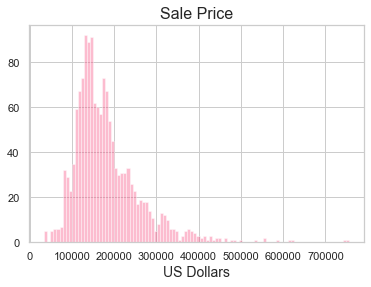

In [26]:
sns.set(style="whitegrid")
sns.distplot(df['SalePrice'], kde=False, color='#F85888', bins=100)
plt.title('Sale Price', fontsize=16)
plt.xlabel('US Dollars', fontsize=14)

### Kernel Density Estimation Plot of Sale Price

Text(0, 0.5, 'Density')

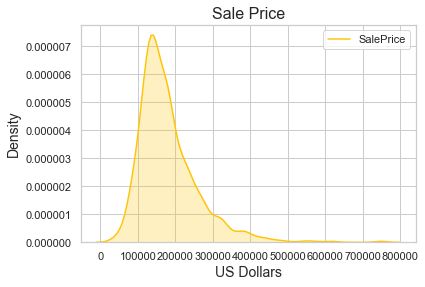

In [27]:
sns.set(style="whitegrid")
sns.kdeplot(df['SalePrice'], color='#fec508', shade=True)
plt.title('Sale Price', fontsize=16)
plt.xlabel('US Dollars', fontsize=14)
plt.ylabel('Density', fontsize=14)



### Outlier Analysis

From the boxplot below, we can confirm that most of the Sale Price values fall within a certain range but there are some values that clearly lie outside of the normal distribution. Based upon the dataset, this probably accounts for properties with an abnormally high sale price.

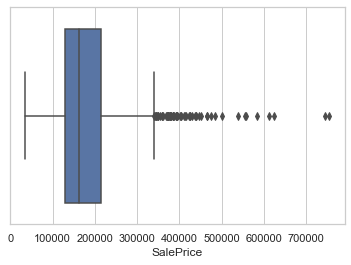

In [28]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['SalePrice'])

Two ways to find outliers are using the **Z-Score** and the **Interquartile Range**. The IQR is the difference between the first and third quartile. The Z-score is the number of standard deviations below or above the mean value. Both allow you to find extreme values outside of the norm.

#### Z-Score

In [29]:
#returns an array of rows containing outliers using the z score

from scipy import stats

def get_z_score(data):
    z = np.abs(stats.zscore(data))
    threshold = 3
    print(np.where(z > 3))

z_score = get_z_score(df['SalePrice'])
z_score

(array([  58,  178,  185,  349,  389,  440,  473,  496,  527,  591,  664,
        691,  769,  798,  803,  898, 1046, 1142, 1169, 1182, 1243, 1373]),)


#### Interquartile Range (IQR)

In [30]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

84025.0


How you decide to handle outliers will vary depending upon the dataset. For this particular case, I've decided to exclude the outliers and put them in their own dataframe so I can run my analysis on both and see how the results vary. What affects the sale price for these extreme values may offer a different perspective than what affects the values that fall within the normal range.

In [31]:
#returns a dataframe free of values that fall outside of the interquartile range
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > lower) & (df[col_name] < upper)]
    return df_out

new_df = remove_outlier(df, 'SalePrice')

In [32]:
#comparing the old and new dataframe to confirm that it worked
print(new_df.shape)
print(df.shape)

(1399, 76)
(1460, 76)


### Correlation vs Association

The main question we seek to answer is which individual feature has the most impact on the sales price? To me, the best way to measure that is to examine the relationship between the features and the sales price.

Pandas .corr() function is a very convenient way to find pairwise correlation of the columns within the dataframe by creating a correlation matrix. Ultimately, I want to perform feature reduction by eliminating columns that are highly correlated to each other because the information they provide is redundant. The only caveat is that this function excludes nonnumerical data.

Below, I used seaborn to create a heatmap that shows the correlation values between the features and the sales price. This map also shows whether the feature negatively or positively correlates with the sales price which can tell us some things about the data. I don't see any features with a significant negative effect on the price.

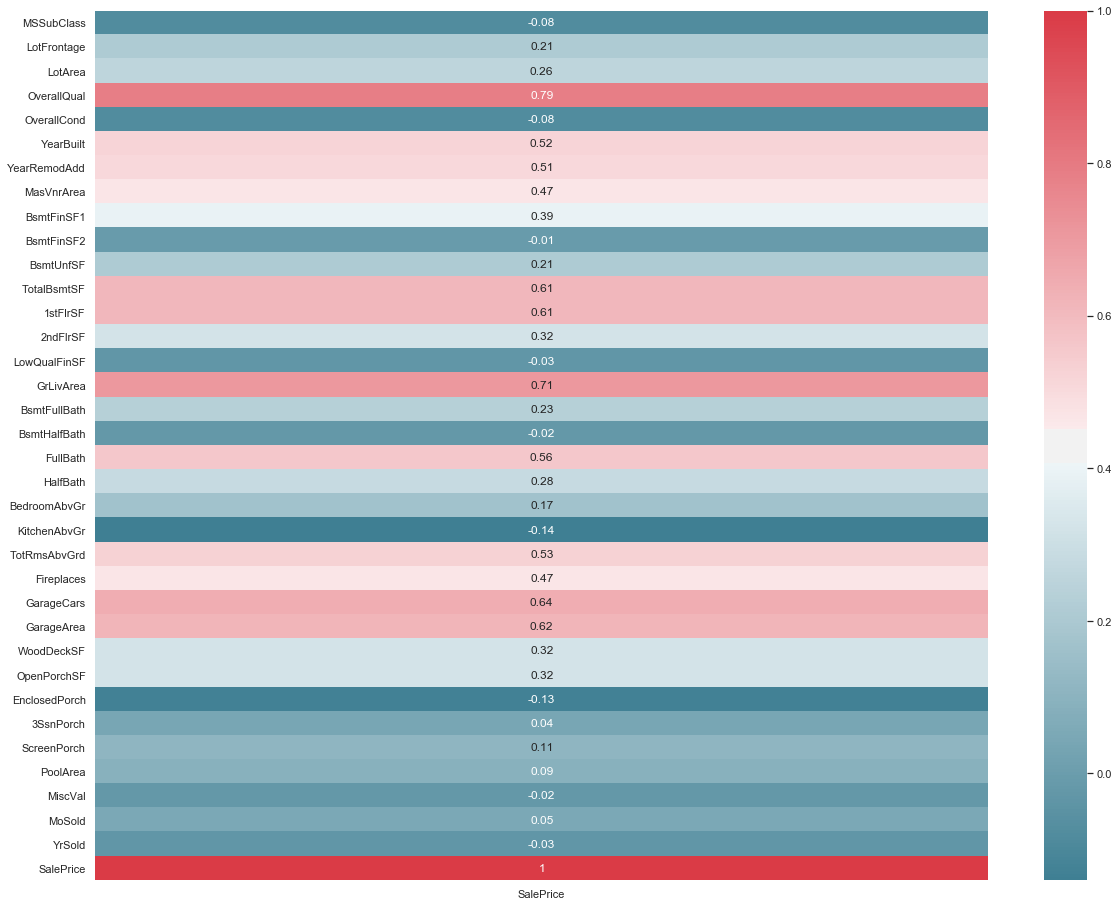

In [33]:
f, ax = plt.subplots(figsize=(20,16))
corr = df.corr().round(2)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr[['SalePrice']], cmap=cmap, annot=True)

This piece of code below is designed to identify the most relevant features by identify the ones with a correlation value of 0.5 or higher (positive or negative). Out of the 36 features, only 9 of them appear to be related. This is important because we can start to eliminate features which brings us closer to answering our question.

The overall quality has the **highest correlation** with the sales price, which doesn't come as a surprise to me. Earlier in the notebook I mentioned this was a column to look out for. However, I am surprised that the overall condition of the house isn't as relevant.

In [34]:
#Correlation with output variable
cor_target = abs(corr["SalePrice"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.79
YearBuilt       0.52
YearRemodAdd    0.51
TotalBsmtSF     0.61
1stFlrSF        0.61
GrLivArea       0.71
FullBath        0.56
TotRmsAbvGrd    0.53
GarageCars      0.64
GarageArea      0.62
SalePrice       1.00
Name: SalePrice, dtype: float64

#### The values below are taken from the outliers dataframe. I created a correlation matrix to see if these values differ from the results of the clean dataframe and I see little to no difference. 

In [35]:
out_corr = new_df.corr().round(2)
#Correlation with output variable
cor_target_out = abs(out_corr["SalePrice"])

#Selecting highly correlated features
relevant_features_out = cor_target_out[cor_target_out>0.5]
relevant_features_out

OverallQual     0.78
YearBuilt       0.56
YearRemodAdd    0.54
TotalBsmtSF     0.54
1stFlrSF        0.52
GrLivArea       0.66
FullBath        0.58
GarageCars      0.63
GarageArea      0.61
SalePrice       1.00
Name: SalePrice, dtype: float64

#### Next, I've decided to drop the columns that have low correlation with the sales price since they won't help us answer the question at hand. The new dataframe and heatmap is visible below.

In [39]:
new_corr = new_corr[abs(corr["SalePrice"])>0.5].T
new_corr[["SalePrice"]]

,SalePrice
OverallQual,0.79
YearBuilt,0.52
YearRemodAdd,0.51
TotalBsmtSF,0.61
1stFlrSF,0.61
GrLivArea,0.71
FullBath,0.56
TotRmsAbvGrd,0.53
GarageCars,0.64
GarageArea,0.62


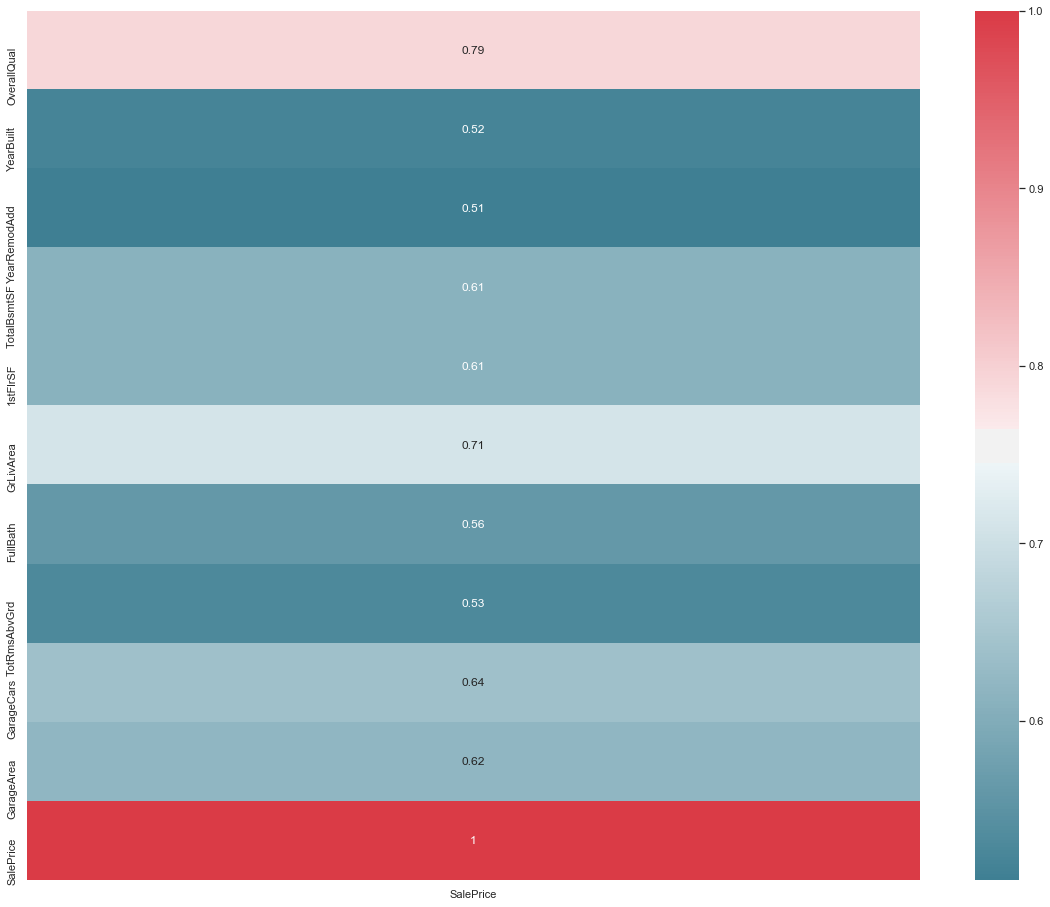

In [40]:
f, ax = plt.subplots(figsize=(20,16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(new_corr[['SalePrice']], cmap=cmap, annot=True)

_This is not a very efficient way of dropping those columns but I plan to refactor later and create a function for this._

In [41]:
df = df.drop(columns=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','Fireplaces','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold','YrSold'])
df.shape

(1460, 51)

Before doing the correlation analysis, I had **76 features**. After dropping the seemingly irrelevant columns based upon the correlation value, I am down to **51 features** that could potentially best describe the sale price.

### Feature Selection

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

The main question we seek to answer is **which individual feature best describes the sales price?** To me, the best way to measure that is to examine the relationship between the features and the sales price. In order to include our categorical data, we will require an alternative method for finding the _association_ between these features and the sale price.

I had a hard time deciding which method was best since the dataset has a mix of numerical and categorical data. Finally, after much delibiration. 

_shoutout to Hugo Ferreira for unblocking me with this awesome class found [here](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d)._

In [44]:
class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms specified columns of X in self.columns with LabelEncoder().
        '''
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for col_name, col in output.iteritems(): #iterates over key val pairs
                output[col_name] = LabelEncoder().fit_transform(col)
        
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)
                

In [69]:
for col in df:
    if df[col].dtype == np.float64:
        df[col].apply(pd.to_numeric, errors='coerce', axis=1)

In [70]:
df.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
1stFlrSF          int64
GrLivArea         int64
FullBath          int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
FireplaceQu      object
GarageType       object
GarageYrBlt     

In [71]:
X = df.drop(columns='SalePrice')
y = df['SalePrice'].astype(int).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [72]:
enc = MultiColumnLabelEncoder()
X_train_enc = enc.fit_transform(X_train)
X_train_enc.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1292,4,1,3,3,0,0,0,17,2,2,0,5,4,5,15,1,0,13,14,3,3,4,4,4,4,4,6,6,227,1,4,0,5,435,646,2,3,9,3,3,1,70,2,1,113,5,5,2,8,4
1018,3,1,0,3,0,2,0,8,2,2,0,7,6,88,42,1,0,6,6,1,2,4,2,2,4,4,6,6,6,1,2,1,5,77,316,2,2,5,5,5,1,76,2,2,93,5,5,2,8,4
1213,3,1,0,3,0,1,0,19,2,2,0,7,3,62,51,1,0,12,13,3,3,2,1,4,1,0,3,6,44,1,0,1,5,172,74,0,3,1,5,3,1,50,3,1,71,5,5,2,8,4
1430,3,1,2,3,0,4,0,8,6,2,0,5,4,102,55,1,0,12,13,3,2,4,2,2,1,0,6,6,84,1,0,1,5,44,499,2,3,5,5,2,3,90,0,2,76,5,5,2,8,4
810,3,1,3,3,0,4,0,14,2,2,0,2,5,71,49,3,0,6,6,1,3,4,1,4,4,4,1,4,250,1,1,1,5,404,240,1,2,3,5,1,1,59,2,2,154,5,5,2,8,4


In [93]:
X_train_enc

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1292,4,1,3,3,0,0,0,17,2,2,0,5,4,5,15,1,0,13,14,3,3,4,4,4,4,4,6,6,227,1,4,0,5,435,646,2,3,9,3,3,1,70,2,1,113,5,5,2,8,4
1018,3,1,0,3,0,2,0,8,2,2,0,7,6,88,42,1,0,6,6,1,2,4,2,2,4,4,6,6,6,1,2,1,5,77,316,2,2,5,5,5,1,76,2,2,93,5,5,2,8,4
1213,3,1,0,3,0,1,0,19,2,2,0,7,3,62,51,1,0,12,13,3,3,2,1,4,1,0,3,6,44,1,0,1,5,172,74,0,3,1,5,3,1,50,3,1,71,5,5,2,8,4
1430,3,1,2,3,0,4,0,8,6,2,0,5,4,102,55,1,0,12,13,3,2,4,2,2,1,0,6,6,84,1,0,1,5,44,499,2,3,5,5,2,3,90,0,2,76,5,5,2,8,4
810,3,1,3,3,0,4,0,14,2,2,0,2,5,71,49,3,0,6,6,1,3,4,1,4,4,4,1,4,250,1,1,1,5,404,240,1,2,3,5,1,1,59,2,2,154,5,5,2,8,4
477,3,1,3,3,0,4,0,16,2,2,0,5,8,103,56,3,0,12,13,1,0,4,2,2,4,0,6,6,587,1,0,1,5,623,682,2,0,7,5,2,3,91,0,3,290,5,5,2,8,4
874,4,1,3,3,0,4,0,17,0,2,0,0,4,40,0,1,0,13,14,3,3,4,1,4,4,4,6,6,56,1,0,1,5,26,151,1,3,3,5,3,5,29,3,1,7,5,5,2,8,0
505,4,1,3,3,0,4,0,17,0,2,2,5,4,49,2,3,0,13,14,1,3,4,1,4,4,4,6,6,201,1,2,1,5,172,545,2,3,8,5,3,5,37,3,2,92,5,5,0,0,4
1418,3,1,3,3,0,4,0,12,2,2,0,2,4,60,13,1,0,6,6,3,3,4,1,4,4,4,2,5,314,1,4,1,5,302,158,1,3,4,5,3,5,47,3,1,62,5,5,2,0,4
634,3,1,3,3,0,4,0,17,2,2,2,6,5,77,30,1,0,9,10,3,3,4,1,4,4,4,3,6,259,1,2,1,5,239,112,0,3,2,5,3,5,65,3,2,219,5,5,2,8,4


In [74]:
one_hot_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_one_h = one_hot_enc.fit_transform(X_train_enc)
X_train_one_h

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [76]:
X_train_one_h.shape

(1095, 2885)

In [78]:
X_test_enc = enc.transform(X_test)
X_test_one_h = one_hot_enc.transform(X_test_enc)
X_test_one_h

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [79]:
X_test_one_h.shape

(365, 2885)

In [90]:
features = df.columns.tolist()
clf = RandomForestClassifier(n_estimators=300, random_state=0, n_jobs=-1)
clf.fit(X_train_one_h, y_train)
clf.score(X_test_one_h, y_test)

0.0

In [89]:
for feature in zip(features, clf.feature_importances_):
    print(feature)

('MSZoning', 0.00037322319109445433)
('Street', 0.0010090156054563216)
('LotShape', 0.0005554664582001261)
('LandContour', 0.003187849402449445)
('Utilities', 0.0024221158640509535)
('LotConfig', 0.0003706742761390282)
('LandSlope', 0.00023915269165727498)
('Neighborhood', 0.005044257142878888)
('Condition1', 0.0011697532467146185)
('Condition2', 0.00037112972751865685)
('BldgType', 0.00513877078722856)
('HouseStyle', 0.0011192574751466523)
('OverallQual', 0.0007392960644492942)
('YearBuilt', 0.0009065991068408866)
('YearRemodAdd', 0.0019098050682398253)
('RoofStyle', 0.00011905491089797703)
('RoofMatl', 9.322796711179206e-05)
('Exterior1st', 0.003946518369717066)
('Exterior2nd', 0.001865178444844031)
('MasVnrType', 0.001204279908726336)
('ExterQual', 0.00013128958942415617)
('ExterCond', 0.004945883109189689)
('Foundation', 0.0013916205726146444)
('BsmtQual', 0.0012223188239662073)
('BsmtCond', 0.00042725939084456015)
('BsmtExposure', 0.0004217048686540373)
('BsmtFinType1', 0.00020199

## Resources

- [Using pandas describe method dataframe summary](https://backtobazics.com/python/pandas-describe-method-dataframe-summary/)
- [How to make histogram in python with pandas and seaborn](https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/)
- [Ways to Detect and Remove Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
- [When Should You Delete Outliers from a Data Set?](https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/)
- [Remove local outliers from Dataframe using pandas](https://datascience.stackexchange.com/questions/33632/remove-local-outliers-from-dataframe-using-pandas)
- [InterQuartile Range (IQR)](http://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/bs704_summarizingdata7.html)
- [Z-Score: Definition, Formula and Calculation](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/)
- [Python|Pandas dataframe.corr()](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/)
- [The Search for Categorical Correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
-[How to check the dtype of a column in python pandas](https://stackoverflow.com/questions/22697773/how-to-check-the-dtype-of-a-column-in-python-pandas/22697903)